In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('electriccars.csv')

In [3]:
df.head(2)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"


In [4]:
df.shape

(180, 11)

In [5]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [6]:
#Data Cleaning

# extract numeric data
def extract_num(x):
    """
    this function extracts the numeric data from the string 
    and converts the data type to float. 
    It uses a regex to extact intergers and floats.
    """
    return float(re.findall(r"[-+]?\d*\.?\d+|\d+", x)[0])

In [7]:
df['Acceleration'][0]

'7.3 sec'

In [8]:
print(extract_num(df['Acceleration'][0]))
print(type(extract_num(df['Acceleration'][0])))

7.3
<class 'float'>


In [9]:
df['BatteryCapacity'] = df['Subtitle'].apply(extract_num)

In [10]:
# extract brand name from name
df['BrandName'] = df['Name'].apply(lambda x: x.split()[0])

In [11]:
# example
df['Name'][0].split()

['Opel', 'Ampera-e']

In [12]:
df['Name'][0].split()[0]

'Opel'

In [13]:
for col_name in ['Acceleration', 'TopSpeed', 'Range', 'Efficiency']:
    df[col_name] = df[col_name].apply(extract_num)

In [14]:
df.drop(columns=['PriceinUK', 'Subtitle'] , axis=1, inplace=True)

In [15]:
df['PriceinGermany'] = df['PriceinGermany']\
                                           .fillna('-1')\
                                           .apply(lambda x: re.sub(',', '', x))\
                                           .apply(extract_num)\
                                           .replace(-1, np.nan)

In [16]:
FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

In [17]:
df['FastChargeSpeed'] = df['FastChargeSpeed'].replace(0, np.nan)

In [18]:
df.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
1,Renault Kangoo Maxi ZE 33,22.4,130.0,160.0,194.0,NaN,Front Wheel Drive,5,NaN,31.0,Renault


In [19]:
# datatypes of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Acceleration     180 non-null    float64
 2   TopSpeed         180 non-null    float64
 3   Range            180 non-null    float64
 4   Efficiency       180 non-null    float64
 5   FastChargeSpeed  175 non-null    float64
 6   Drive            180 non-null    object 
 7   NumberofSeats    180 non-null    int64  
 8   PriceinGermany   168 non-null    float64
 9   BatteryCapacity  180 non-null    float64
 10  BrandName        180 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 15.6+ KB


In [20]:
# shape of cleaned dataset
df.shape

(180, 11)

In [21]:
 df1 = df.dropna()

In [22]:
df1.shape

(164, 11)

In [23]:
df1.isnull().sum()

Name               0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
BatteryCapacity    0
BrandName          0
dtype: int64

In [24]:
df1.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
2,Nissan Leaf,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,36.0,Nissan


In [25]:
cars = df1.drop_duplicates()

In [26]:
cars.shape

(163, 11)

In [27]:
cars.Name = cars.Name.str.strip()

C:\Users\atlab\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
min_value = cars['PriceinGermany'].min()
min_value

20490.0

In [29]:
max_value =cars['PriceinGermany'].max() 
max_value

215000.0

In [30]:
min_value = cars['Range'].min()
min_value

165.0

In [31]:
max_value =cars['Range'].max() 
max_value

970.0

In [32]:
cars_1 = cars.rename(columns = {"Acceleration": "acceleration_in_sec", 
                                "Range": "range_km", 
                                "TopSpeed": "top_speed_km_h",
                                "Efficiency": "efficiency_Wh_km",
                                "FastChargeSpeed": "fast_charge_speed_km_h",
                                "PriceinGermany": "price_in_euros",
                                "BatteryCapacity": "batter_capacity_kWh"
                               })

In [33]:
cars_1

,Name,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,Drive,NumberofSeats,price_in_euros,batter_capacity_kWh,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
2,Nissan Leaf,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,36.0,Nissan
4,Porsche Taycan Turbo S,2.8,260.0,390.0,215.0,860.0,All Wheel Drive,4,186336.0,83.7,Porsche
5,Nissan e-NV200 Evalia,14.0,123.0,165.0,218.0,170.0,Front Wheel Drive,7,43433.0,36.0,Nissan
6,Volkswagen ID.3 Pure Performance,8.9,160.0,275.0,164.0,260.0,Rear Wheel Drive,5,31960.0,45.0,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...
174,Peugeot e-Rifter Long 50 kWh,11.7,135.0,195.0,231.0,260.0,Front Wheel Drive,7,42590.0,45.0,Peugeot
175,MG Marvel R,7.9,200.0,340.0,191.0,390.0,Rear Wheel Drive,5,40000.0,65.0,MG
176,Tesla Model 3 Long Range Dual Motor,4.4,233.0,490.0,155.0,820.0,All Wheel Drive,5,53560.0,76.0,Tesla
178,Audi Q4 e-tron 45 quattro,6.9,180.0,385.0,199.0,470.0,All Wheel Drive,5,50900.0,76.6,Audi


In [34]:
X = cars_1.drop(columns=['price_in_euros'])
y = cars_1['price_in_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
X_train.head()

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130, 10) (33, 10) (130,) (33,)


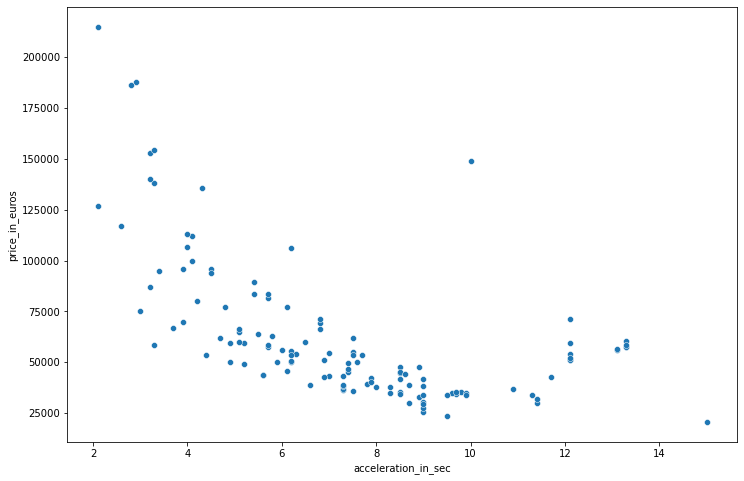

In [35]:
#1st iteration: dummy model and linear regression + regression errors

plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['acceleration_in_sec'], y=y_train)
plt.show()

In [36]:
def my_dummy_model(acceleration_in_sec): 
    return acceleration_in_sec * 8000

dummy_model_res = (
X_train
    .assign(
        preds = lambda x: my_dummy_model(x['acceleration_in_sec']), 
        price = y_train
        )
    .assign(
        error = lambda x:  x['preds'] - x['price']
    )
)
dummy_model_res

,Name,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,Drive,NumberofSeats,batter_capacity_kWh,BrandName,preds,price,error
88,Volkswagen ID.4 Pro Performance,8.5,160.0,410.0,188.0,500.0,Rear Wheel Drive,5,77.0,Volkswagen,68000.0,44450.0,23550.0
164,Toyota PROACE Verso L 50 kWh,12.1,130.0,180.0,250.0,240.0,Front Wheel Drive,7,45.0,Toyota,96800.0,59385.0,37415.0
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,58.0,Opel,58400.0,42990.0,15410.0
112,Peugeot e-Traveller Compact 50 kWh,12.1,130.0,185.0,243.0,250.0,Front Wheel Drive,7,45.0,Peugeot,96800.0,50880.0,45920.0
33,Volkswagen ID.3 Pro S,7.9,160.0,450.0,171.0,550.0,Rear Wheel Drive,4,77.0,Volkswagen,63200.0,41995.0,21205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Tesla Model 3 Performance,3.3,261.0,470.0,162.0,790.0,All Wheel Drive,5,76.0,Tesla,26400.0,58560.0,-32160.0
152,Polestar 2 Standard Range Single Motor,7.4,160.0,350.0,174.0,450.0,Front Wheel Drive,5,61.0,Polestar,59200.0,46500.0,12700.0
149,Mercedes EQS 450+,6.2,210.0,640.0,168.0,840.0,Rear Wheel Drive,5,107.8,Mercedes,49600.0,106374.0,-56774.0
118,Audi e-tron Sportback 55 quattro,5.7,200.0,375.0,231.0,600.0,All Wheel Drive,5,86.5,Audi,45600.0,83750.0,-38150.0


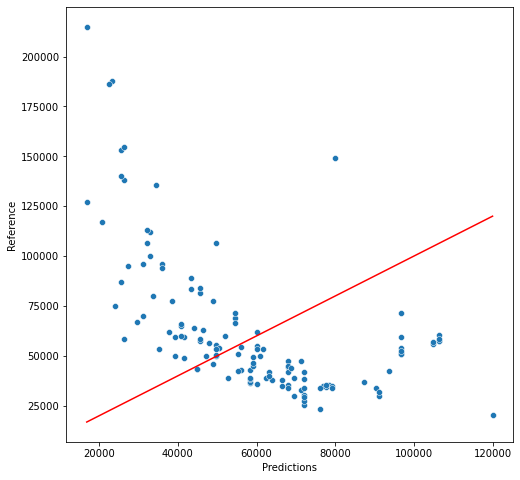

In [37]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

plot_predictions(dummy_model_res['price'], dummy_model_res['preds'])

In [38]:
# Creating our first Linear Model

np.array(X_train['acceleration_in_sec']).reshape(-1, 1)

array([[ 8.5],
       [12.1],
       [ 7.3],
       [12.1],
       [ 7.9],
       [ 4.5],
       [ 4.1],
       [ 7.5],
       [ 3.3],
       [ 3.7],
       [ 4.3],
       [ 3.2],
       [ 8.9],
       [ 3.9],
       [ 9.8],
       [ 7.3],
       [ 7.3],
       [ 4.9],
       [ 6.8],
       [ 2.6],
       [ 5.2],
       [ 9.9],
       [12.1],
       [ 8.3],
       [ 5.1],
       [ 9.7],
       [ 9.7],
       [13.1],
       [11.7],
       [ 4. ],
       [ 9. ],
       [ 5.2],
       [ 6.1],
       [ 8.5],
       [ 6.2],
       [ 4.2],
       [ 4.7],
       [ 9. ],
       [ 3.9],
       [ 7.7],
       [ 6.8],
       [ 6.6],
       [13.1],
       [11.3],
       [ 2.9],
       [ 3.4],
       [ 4.5],
       [ 3.2],
       [ 2.1],
       [ 7.8],
       [ 8. ],
       [ 5.6],
       [ 8.9],
       [12.1],
       [ 7.5],
       [ 2.1],
       [ 5.7],
       [ 8.5],
       [ 7.3],
       [ 6.3],
       [ 4. ],
       [ 6.1],
       [ 7.5],
       [ 8.3],
       [ 5.6],
       [ 4.4],
       [ 5

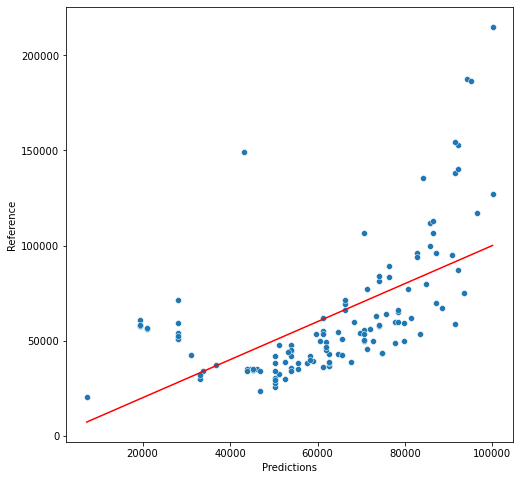

In [39]:
lm = LinearRegression()
lm.fit(np.array(X_train['acceleration_in_sec']).reshape(-1, 1), y_train)
plot_predictions(y_train, lm.predict(np.array(X_train['acceleration_in_sec']).reshape(-1, 1)))

In [40]:
print(
    lm.coef_, 
    lm.intercept_
    )

[-7193.25791437] 115121.98448024612


    price=115121.98448024612+acceleration_in_sec∗-7193.25791437

In [41]:
# Results on test set

results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test['acceleration_in_sec']).reshape(-1, 1)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
163,28083.563716,58530.0
81,61172.550122,45000.0
173,30960.866882,37590.0
31,56137.269582,31990.0
20,56856.595374,30450.0


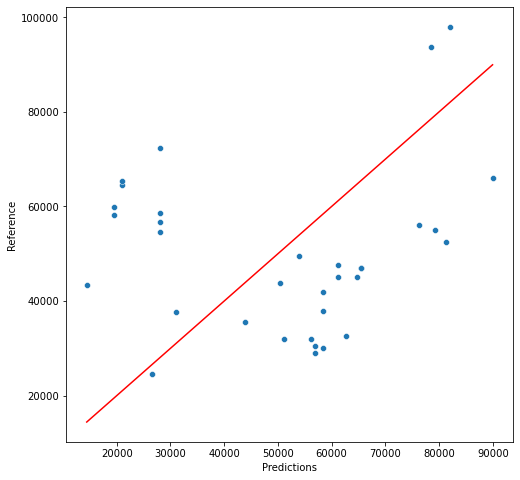

In [42]:
plot_predictions(results.true_values, results.predictions)

In [43]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    6.567129e+08
dtype: float64

In [44]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

656712864.0347239

In [45]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    25626.409503
dtype: float64

In [46]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    23086.479933
dtype: float64

In [47]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

23086.479932998398

In [48]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mse': 656712864.0347239,
  'mae': 23086.479932998398,
  'mape': 0.4883522709774631}}


        MSE: 656712864.0347239
        RMSE: 25626.40950337608
        MAE: 23086.479932998398
        MAPE: 0.4883522709774631
        
89945.58177995082 24650.0


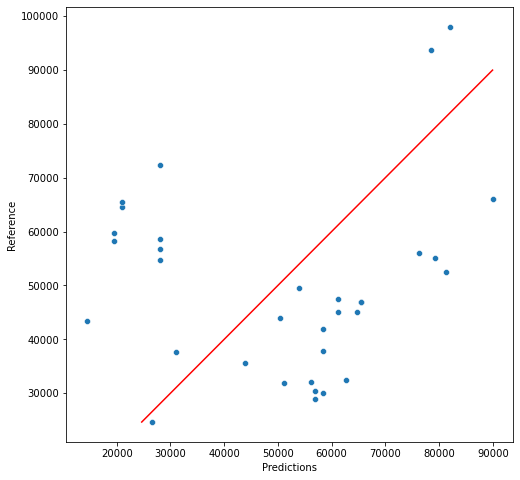

In [49]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

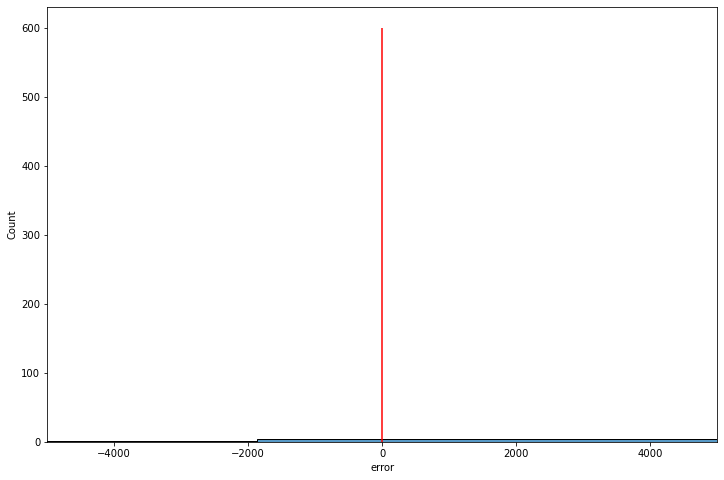

In [50]:
p_df = results.assign(error = lambda x: x['predictions'] - x['true_values'])

plt.subplots(figsize=(12, 8))
sns.histplot(p_df['error'])
plt.vlines(x=0, ymin=0, ymax=600, color='red')
plt.xlim(-5000, 5000)
plt.show()

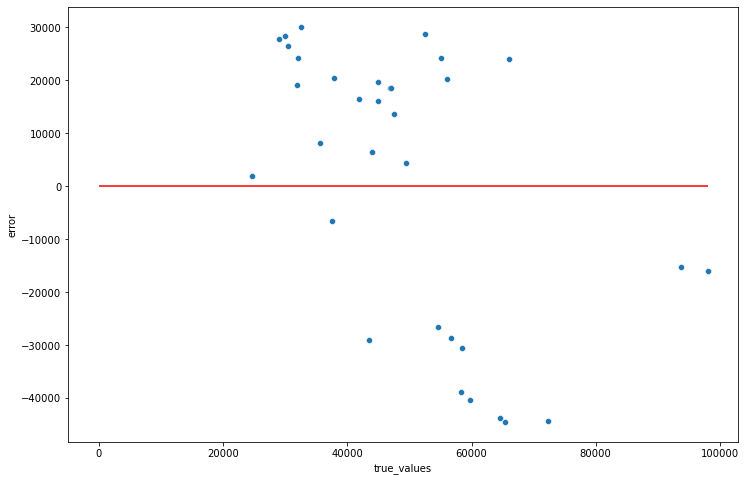

In [51]:
# another way to visualise our errors
p_df = p_df.sort_values(by='true_values')

plt.subplots(figsize=(12, 8))
sns.scatterplot(data=p_df, x='true_values', y='error')
plt.hlines(y=0, xmin=0, xmax=max(p_df['true_values']), color='red')
plt.show()

In [52]:
# 2nd iteration: Sklearn pipeline + all features

X_train.head()

,Name,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,Drive,NumberofSeats,batter_capacity_kWh,BrandName
88,Volkswagen ID.4 Pro Performance,8.5,160.0,410.0,188.0,500.0,Rear Wheel Drive,5,77.0,Volkswagen
164,Toyota PROACE Verso L 50 kWh,12.1,130.0,180.0,250.0,240.0,Front Wheel Drive,7,45.0,Toyota
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,58.0,Opel
112,Peugeot e-Traveller Compact 50 kWh,12.1,130.0,185.0,243.0,250.0,Front Wheel Drive,7,45.0,Peugeot
33,Volkswagen ID.3 Pro S,7.9,160.0,450.0,171.0,550.0,Rear Wheel Drive,4,77.0,Volkswagen


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cat_pipeline = Pipeline(steps=[
    ('one_hot_enc', OneHotEncoder(drop='first'))
])
num_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('float').columns.tolist()
full_processor = ColumnTransformer(transformers=[
    ('number', num_pipeline, num_cols), 
    ('category', cat_pipeline, cat_cols)
])

lm_pipeline = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', LinearRegression())
])

_ = lm_pipeline.fit(X_train, y_train)
lm_pipeline

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['acceleration_in_sec',
                                                   'top_speed_km_h', 'range_km',
                                                   'efficiency_Wh_km',
                                                   'fast_charge_speed_km_h',
                                                   'batter_capacity_kWh']),
                                                 ('category',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [])])),
                ('model', LinearRegression())])


        MSE: 357895315.2347892
        RMSE: 18918.12134528133
        MAE: 11865.882216008764
        MAPE: 0.1991315201499947
        
206700.6741502019 20490.0


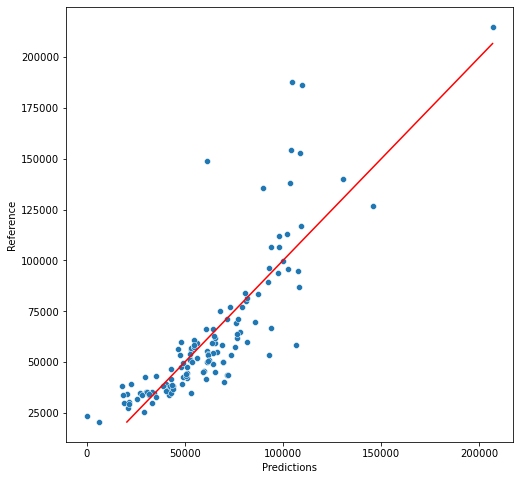

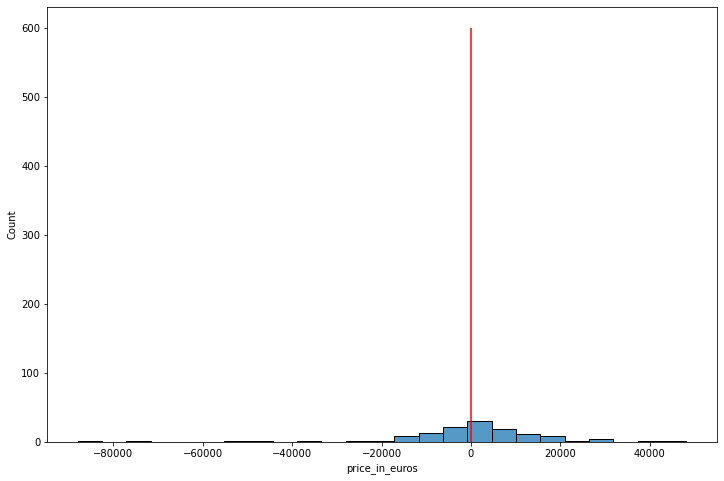

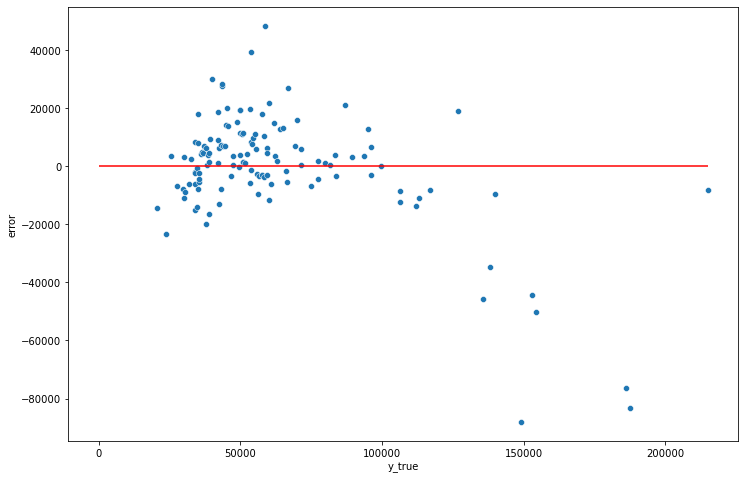

In [54]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)

    }

    

#plot_predictions(y_test, results['predictions'])

mod_res['2nd_iter'] = plot_predictions(y_train, lm_pipeline.predict(X_train))

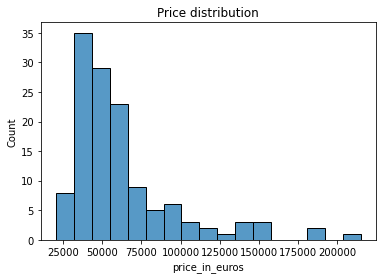

In [55]:
# 3rd iteration: Logirithm tranformation

sns.histplot(y_train)
plt.title('Price distribution')
plt.show()

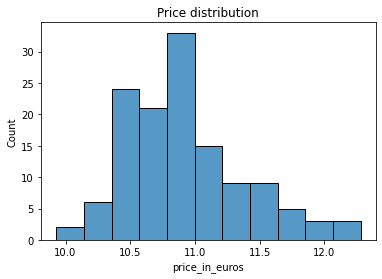

In [56]:
sns.histplot(np.log(y_train))
plt.title('Price distribution')
plt.show()


        MSE: 340018695.6941904
        RMSE: 18439.59586580439
        MAE: 10306.60839606597
        MAPE: 0.1417645581813737
        
215000.0 20490.0


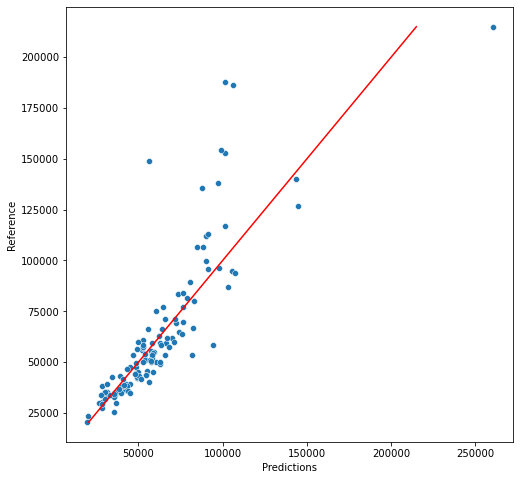

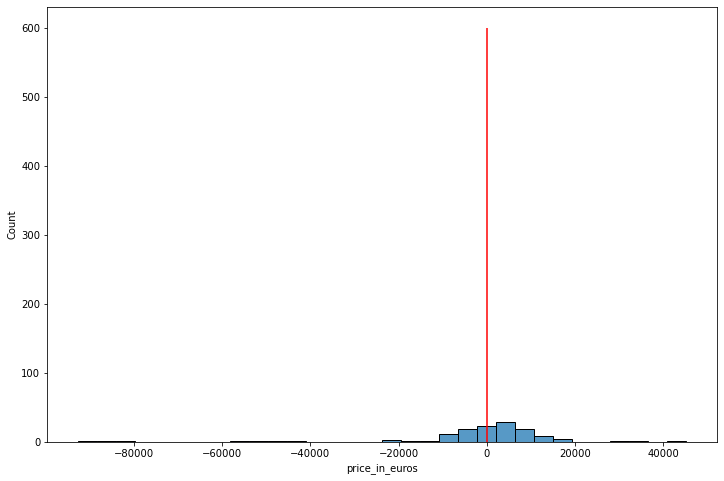

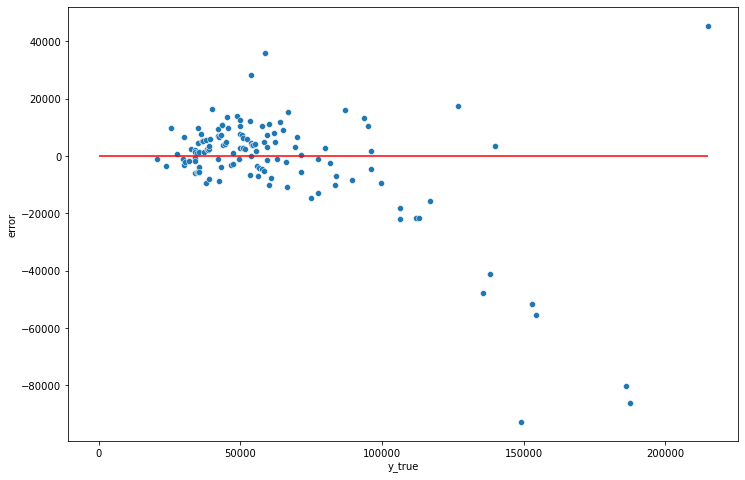

In [57]:
lm_pipeline.fit(X_train, np.log(y_train))
mod_res['3rd_iter'] = plot_predictions(y_train, np.exp(lm_pipeline.predict(X_train)))

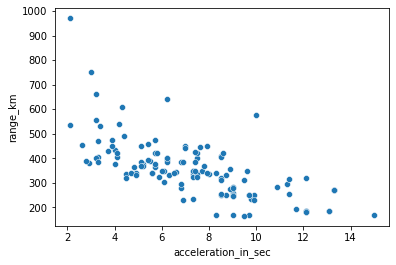

In [58]:
# 4th iteration: exploring correlation

sns.scatterplot(data=X_train, x="acceleration_in_sec", y="range_km")
plt.show()

In [59]:
import numpy as np

X_train_copy = X_train.copy()

X_train_copy['corrn'] = (
    (X_train_copy['acceleration_in_sec'] - np.mean(X_train_copy['acceleration_in_sec'])) * 
    (X_train_copy['range_km'] - np.mean(X_train_copy['range_km']))
)
X_train_copy.head()

X_train_copy['corr1'] = (X_train_copy['acceleration_in_sec'] - np.mean(X_train_copy['acceleration_in_sec']))**2
X_train_copy.head()

X_train_copy['corr2'] = (X_train_copy['range_km'] - np.mean(X_train_copy['range_km']))**2
X_train_copy.head()

corrn = sum(X_train_copy['corrn'])/np.sqrt(sum(X_train_copy['corr1']) * sum(X_train_copy['corr2']))
corrn

-0.6877472906343427

In [60]:
# 1. function that given two columns, it returns the corr. coeficient
def corr_coeff(df, var1, var2): 
    temp = df.copy()
    temp['corrn'] = (
        (temp[var1] - np.mean(temp[var1])) * 
        (temp[var2] - np.mean(temp[var2]))
    )
    temp['corr1'] = (temp[var1] - np.mean(temp[var1]))**2
    temp['corr2'] = (temp[var2] - np.mean(temp[var2]))**2
    corrn = sum(temp['corrn'])/np.sqrt(sum(temp['corr1']) * sum(temp['corr2']))
    return corrn


# 2. Calculate the corr_coeficients for all the columns
temp = pd.concat([X_train, y_train], axis=1)

print(corr_coeff(temp, 'acceleration_in_sec', 'top_speed_km_h'))
print(corr_coeff(temp, 'price_in_euros', 'range_km'))
print(corr_coeff(temp, 'price_in_euros', 'acceleration_in_sec'))


-0.8374717448252076
0.6179560390050663
-0.5918884375537937


In [61]:
num_cols = X_train.select_dtypes('float').columns
results = []
for col in num_cols:
    res2 = {}
    for col2 in num_cols:
        r = corr_coeff(X_train, col, col2)
        print(f'r between {col} and {col2} is {r}')
        res2[col2] = r
    results.append(res2)
dfr = pd.DataFrame(pd.json_normalize(results))
dfr.index = num_cols

dfr.head()

r between acceleration_in_sec and acceleration_in_sec is 1.0
r between acceleration_in_sec and top_speed_km_h is -0.8374717448252076
r between acceleration_in_sec and range_km is -0.6877472906343427
r between acceleration_in_sec and efficiency_Wh_km is 0.11648293219608007
r between acceleration_in_sec and fast_charge_speed_km_h is -0.7228929386659352
r between acceleration_in_sec and batter_capacity_kWh is -0.6252820700233878
r between top_speed_km_h and acceleration_in_sec is -0.8374717448252076
r between top_speed_km_h and top_speed_km_h is 1.0
r between top_speed_km_h and range_km is 0.742086682379351
r between top_speed_km_h and efficiency_Wh_km is -0.033395008762070695
r between top_speed_km_h and fast_charge_speed_km_h is 0.7534110208531586
r between top_speed_km_h and batter_capacity_kWh is 0.6916631821998748
r between range_km and acceleration_in_sec is -0.6877472906343427
r between range_km and top_speed_km_h is 0.742086682379351
r between range_km and range_km is 1.0
r betwee

,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,batter_capacity_kWh
acceleration_in_sec,1.000000,-0.837472,-0.687747,0.116483,-0.722893,-0.625282
top_speed_km_h,-0.837472,1.000000,0.742087,-0.033395,0.753411,0.691663
range_km,-0.687747,0.742087,1.000000,-0.121502,0.729021,0.886085
efficiency_Wh_km,0.116483,-0.033395,-0.121502,1.000000,-0.146046,0.314974
fast_charge_speed_km_h,-0.722893,0.753411,0.729021,-0.146046,1.000000,0.593684


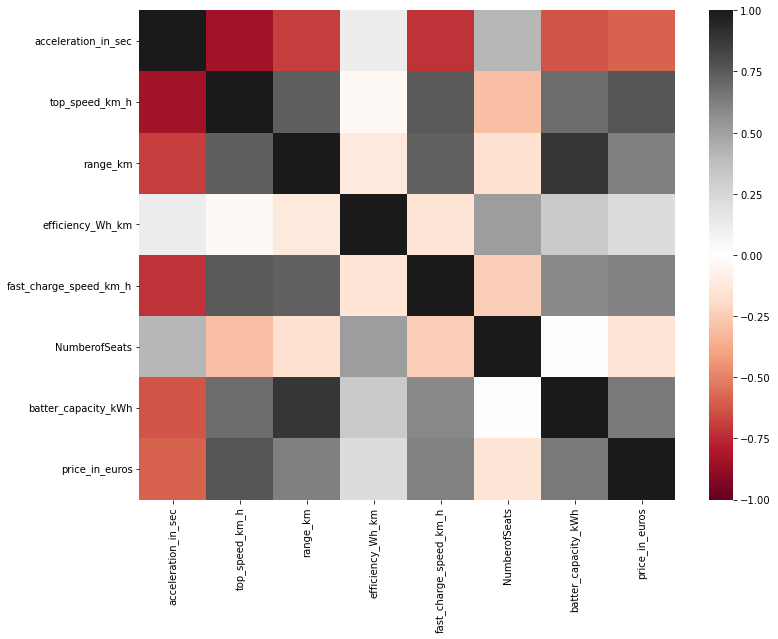

In [62]:
train = pd.concat([X_train, y_train], axis=1)
plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), vmin=-1, vmax=1, cmap='RdGy')
plt.show()